In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from scipy.stats import skewnorm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [3]:
#Import your dataset
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
white_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")

In [4]:
# you can check the beginning or the end of the dataset using the head and tail function
#red_wine.head(10)
red_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# you can use the following to get to know your dataset
#red_wine.info()
#red_wine.shape
red_wine.describe()
df1=red_wine.describe()
#df1 is a variable assigned to red wine description, you can name your variable as you wish complying to the rules of naming a variable.
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#white_wine.head(10)
white_wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
#white_wine.info()
#white_wine.shape
white_wine.describe()
df2=white_wine.describe()
#df2 variable assigned to the description of white wine.
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [9]:
#checking to see if the new column(quality_label) is visible in the dataset.
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [10]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [11]:
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium


In [12]:
#new column created(wine_type)
red_wine['wine_type'] = 'red'

In [13]:
white_wine['wine_type']='white'

In [14]:
#joining the red and white wine dataset using concat
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
# checking if the join was proper.
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


In [16]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red


In [17]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
 13  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [19]:
result=pd.concat([df1,df2] ,"columns")
result
#residual sugar is 2.5 times more in white wine than red wine.
#chloride in red wine is twice as much as in white wine.
#free sulphur dioxide is twice as much in white wine than red wine.
#total sulphur dioxide is 3 times more in white wine than red wine

C:\Users\49152\AppData\Local\Temp\ipykernel_2836\1317619345.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  result=pd.concat([df1,df2] ,"columns")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,...,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,...,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,...,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,...,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,...,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,...,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,...,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,...,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


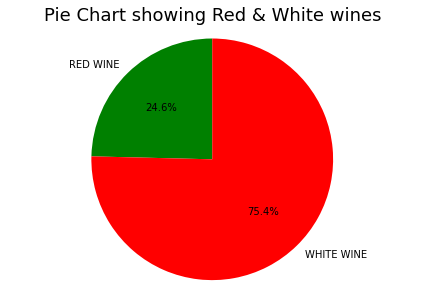

In [20]:
 #Pie chart, where the slices will be ordered and plotted counter-clockwise:

sizes = [1599,4898]
labels = ['RED WINE', 'WHITE WINE']
explode = (0,0) 

colors = ['green','red']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, colors=colors, explode=explode,autopct='%1.1f%%',
        shadow=False, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Pie Chart showing Red & White wines', fontsize=18)
fig1.patch.set_facecolor('white')
plt.show()

In [21]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [22]:
white_wine.iloc[:,11]
Whitewine=white_wine.iloc[:,11]
Whitewine

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [23]:
# to count how many each quality number has and putting it in a list but this does not show which quality has which amount.
count_value_1 = Whitewine.value_counts(sort=False).values.tolist()
count_value_1

[2198, 1457, 880, 175, 163, 20, 5]

In [24]:
# this makes more sense if you want to see how many fall under each quality,shows white wine has no 1&2 quality, the highest quality has the lowest quantity.
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [25]:
red_wine.iloc[:,11]
Redwine=red_wine.iloc[:,11]
Redwine

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [26]:
R_count_value = Redwine.value_counts(sort=False).values.tolist()
R_count_value

[681, 638, 199, 53, 18, 10]

In [27]:
# red wine has no wine quality(1,2 & 9), the quality with the lowest quantity is 3
red_wine['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'quality distribution in Red and White wine')

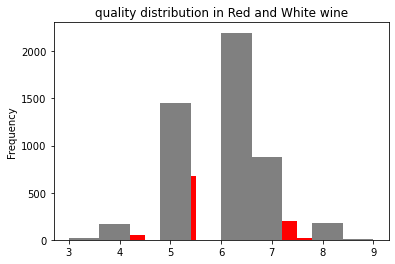

In [28]:
red_wine['quality'].plot.hist(color='red'),white_wine['quality'].plot.hist(color='grey')
plt.title("quality distribution in Red and White wine")


In [29]:
counts=white_wine['quality_label'].value_counts().values.tolist()
counts

[3078, 1640, 180]

In [30]:
counts1=red_wine['quality_label'].value_counts().values.tolist()
counts1

[837, 744, 18]

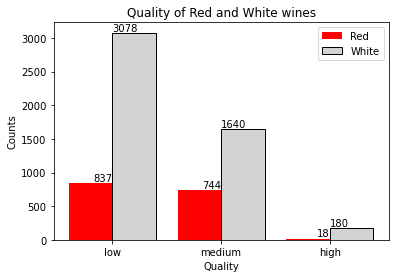

In [31]:
#this visualisation allows you to see that although white wine is more than red wine they both have the same distribution.
X = ['low','medium','high']
Redwine = counts1 #preferable using a variable than using counts1=[837, 744, 18],if you dataset changes your visualization  will be inaccurate
Whitewine = counts
X_axis = np.arange(len(X))

rects1= plt.bar(X_axis - 0.2, Redwine, 0.4, label = 'Red',fc='Red')
rects2= plt.bar(X_axis + 0.2, Whitewine, 0.4,label = 'White',fc='lightgrey',ec='black')
  
plt.xticks(X_axis, X)
plt.xlabel("Quality")
plt.ylabel("Counts")
plt.title("Quality of Red and White wines")
plt.legend()

for i in range(len(X)):
    plt.text(i,Redwine[i],Redwine[i],ha='right', va='bottom') 

for i in range(len(X)):
    plt.text(i,Whitewine[i],Whitewine[i],ha='left',va='bottom') 


plt.show()

# Beginning of box plots and scatter plots


Text(0.5, 1.0, 'Wines Alcohol content vs Quality')

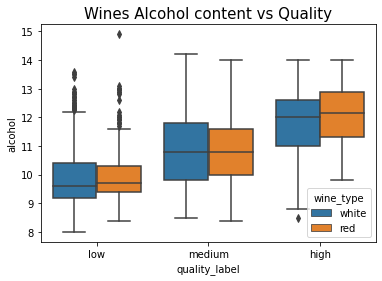

In [32]:
#high quality wines have more alcohol content
sb.boxplot(x='quality_label', y='alcohol',hue=wines["wine_type"], data=wines)

plt.title("Wines Alcohol content vs Quality", fontsize= 15)


Text(0.5, 1.0, 'Wines Density vs Quality')

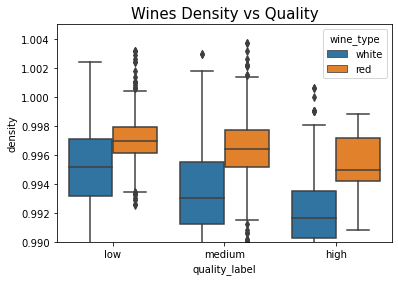

In [33]:
ax2=sb.boxplot(x='quality_label', y='density', hue=wines["wine_type"],data=wines)
ax2.set_ylim(0.99, 1.005)
plt.title("Wines Density vs Quality", fontsize= 15)



(0.0, 100.0)

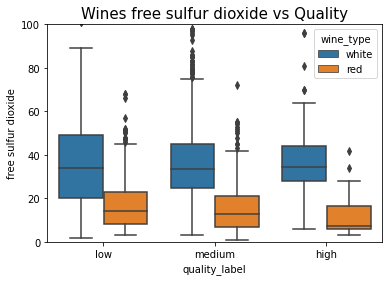

In [34]:
sb.boxplot(x='quality_label', y='free sulfur dioxide', hue=wines["wine_type"],data=wines)

plt.title("Wines free sulfur dioxide vs Quality", fontsize= 15)
plt.ylim(0,100)

(0.0, 1.0)

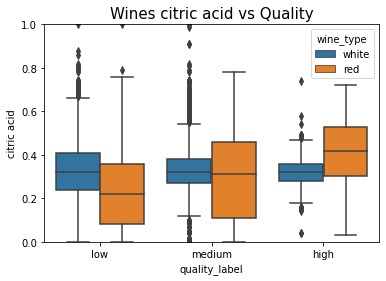

In [35]:
sb.boxplot(x='quality_label', y='citric acid', hue=wines["wine_type"],data=wines)

plt.title("Wines citric acid vs Quality", fontsize= 15)
plt.ylim(0,1.0)

(0.0, 300.0)

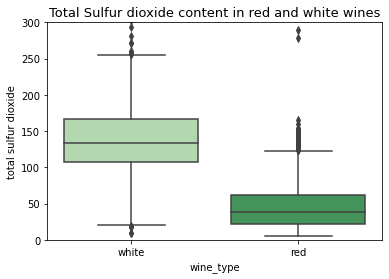

In [36]:
sb.boxplot(x='wine_type', y= wines.iloc[:,6], data=wines,  palette="Greens")
plt.title("Total Sulfur dioxide content in red and white wines", fontsize= 13)
plt.ylim(0,300)

(0.0, 30.0)

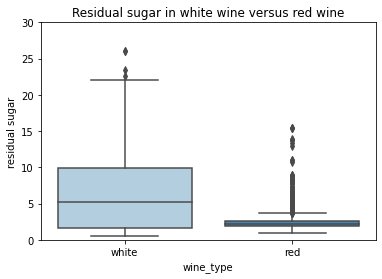

In [37]:
sb.boxplot(x='wine_type', y= wines.iloc[:,3], data=wines,  palette="Blues")
plt.title("Residual sugar in white wine versus red wine")
plt.ylim(0,30)

Text(0.5, 1.0, 'pH in white wine versus red wine.')

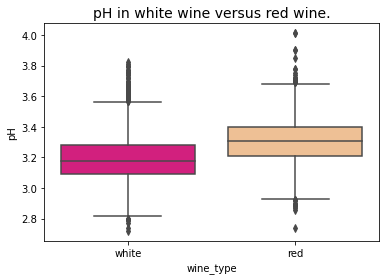

In [38]:
sb.boxplot(x='wine_type', y= wines.iloc[:,8], data=wines,  palette="Accent_r")
plt.title("pH in white wine versus red wine.",fontsize=14)


Text(0.5, 1.0, 'Density in white wine versus red wine')

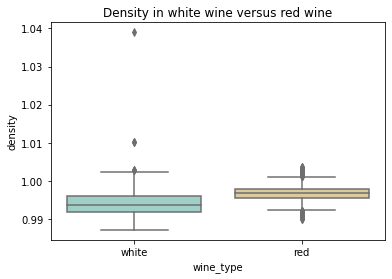

In [39]:
sb.boxplot(x='wine_type', y= wines.iloc[:,7], data=wines,  palette="BrBG_r")
plt.title("Density in white wine versus red wine")


In [40]:
# to check for the statistics of any column just replace the last column with the colum you are checking.e.g low["free sulfur dioxide"] 
#dont forget to specify what wine you are working with,ie.white or red or wines(combined).
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [41]:
F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['residual sugar'],
white_wine[white_wine['quality_label'] == 'medium']['residual sugar'],
white_wine[white_wine['quality_label'] == 'high']['residual sugar'])
print('ANOVA test for mean residual sugar ,levels across white_wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean residual sugar ,levels across white_wine samples with different quality ratings
F Statistic: 21.934773835107606 	p-value: 3.2830889157949124e-10


In [42]:
F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['total sulfur dioxide'],
red_wine[red_wine['quality_label'] == 'medium']['total sulfur dioxide'],
red_wine[red_wine['quality_label'] == 'high']['total sulfur dioxide'])
print('ANOVA test for mean total sulfur dioxide levels across red_wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean total sulfur dioxide levels across red_wine samples with different quality ratings
F Statistic: 45.71048039843774 	p-value: 4.965226898791742e-20


In [43]:
column_1 = wines["fixed acidity"]
column_2 = wines["citric acid"]
correlation = column_1.corr(column_2)
correlation

0.32443572544729815

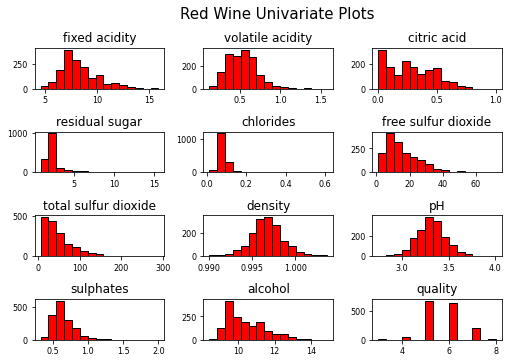

In [44]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

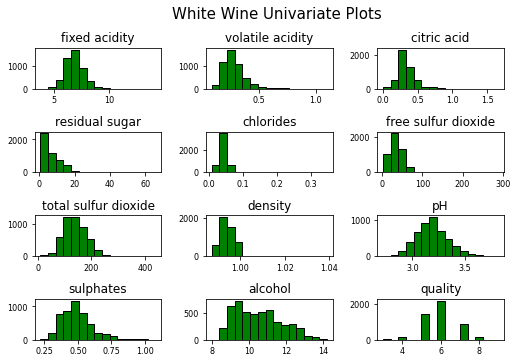

In [45]:
white_wine.hist(bins=15, color='green', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

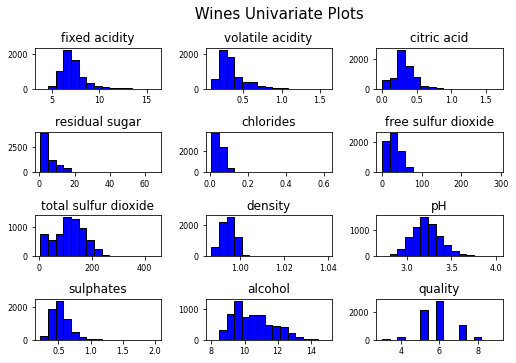

In [46]:
wines.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle(' Wines Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [47]:
# the columns having numbers were selected and the new dataset was given a new name, new_wine.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_wines = wines.select_dtypes(include=numerics)
new_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


In [48]:
#columns were put in a list
columns=list(new_wines.columns.values.tolist())
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [49]:
#converting these columns to arrays to make working on correlation and a heatmap possible
new_wines_np= new_wines.to_numpy()
new_wines_np

array([[ 7.  ,  0.17,  0.74, ...,  0.38, 12.2 ,  8.  ],
       [ 7.7 ,  0.64,  0.21, ...,  0.45,  9.9 ,  5.  ],
       [ 6.8 ,  0.39,  0.34, ...,  0.44, 12.  ,  7.  ],
       ...,
       [ 6.4 ,  0.37,  0.2 , ...,  0.43,  9.5 ,  5.  ],
       [ 6.5 ,  0.26,  0.5 , ...,  0.47,  9.5 ,  5.  ],
       [ 7.2 ,  0.62,  0.06, ...,  0.54,  9.5 ,  5.  ]])

In [50]:
#checking for correlation of new_wines(only numeric columns)
corr=new_wines.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [51]:
#masking makes sure the visualization doesn't show the mirror image
mask=np.zeros_like(new_wines.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

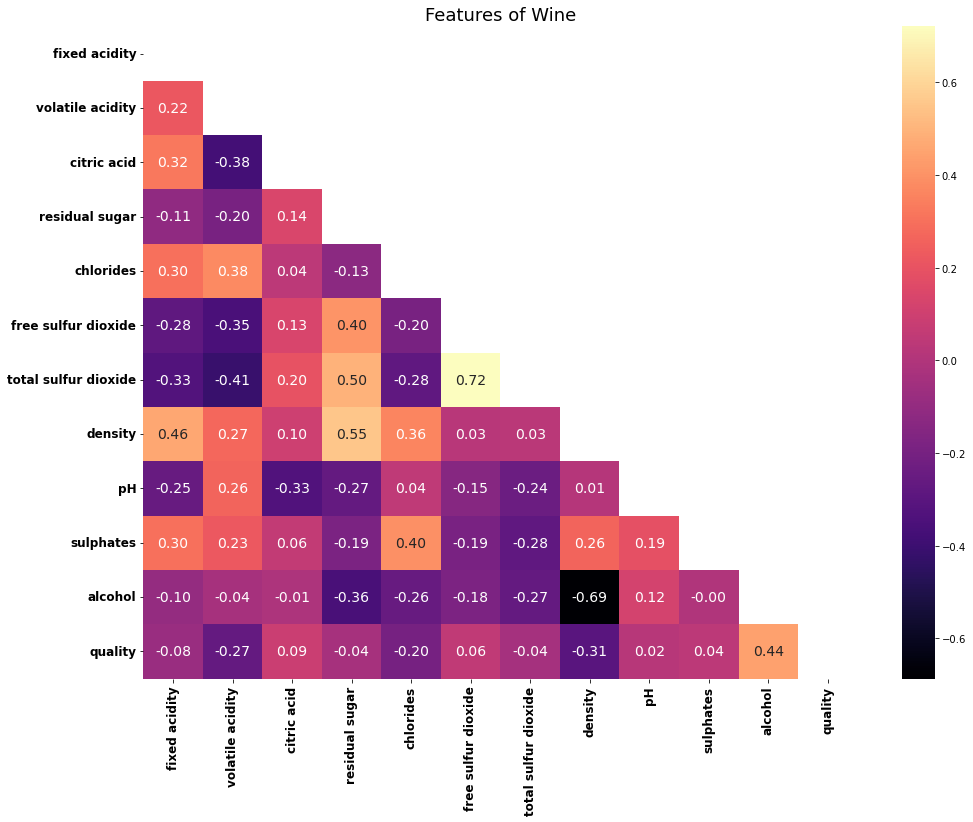

In [52]:
#heatmap shows the correlation between columns dark shade shows no correlation and light shade high correlation. This heatmap is for combined wines.
plt.figure(figsize=(16,12))
sb.heatmap(new_wines.corr(),mask=mask, cmap= "magma",annot=True,annot_kws={'size':14},fmt=".2f")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Features of Wine" ,fontsize=18)

plt.show()

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_red_wine = red_wine.select_dtypes(include=numerics)
new_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
#processing the red wine dataset in order to create a heatmap
new_red_wine_np= new_red_wine.to_numpy()
new_red_wine_np

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [55]:
corr=new_red_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [56]:
mask=np.zeros_like(new_red_wine.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

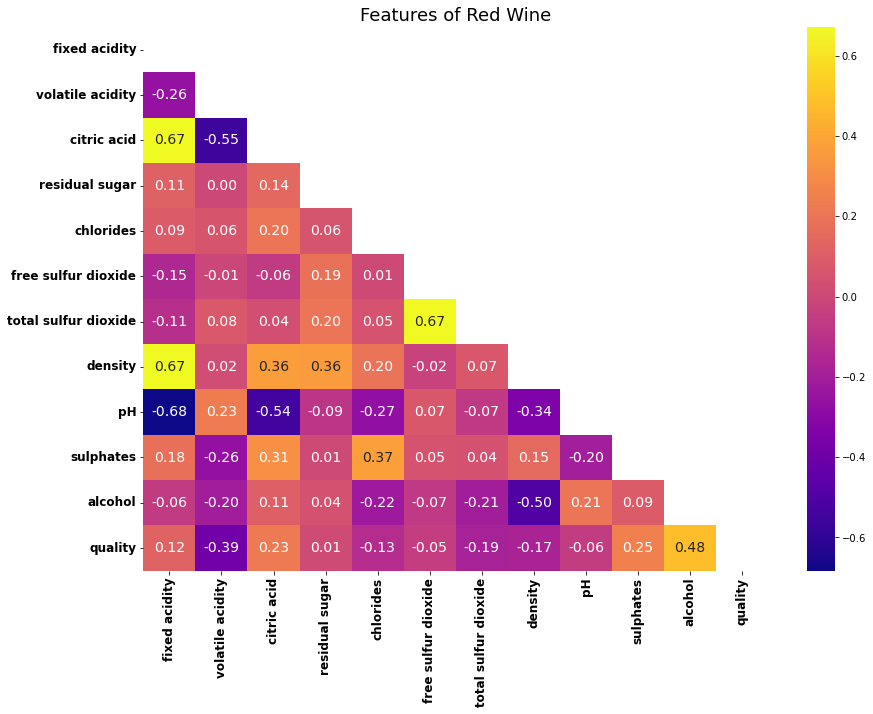

In [57]:
plt.figure(figsize=(14,10))
sb.heatmap(new_red_wine.corr(),mask=mask, cmap= "plasma",annot=True,annot_kws={'size':14},fmt=".2f")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Features of Red Wine" ,fontsize=18)

plt.show()

In [58]:
#processing the numeric white wine data in order to make a heatmap.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_white_wine = white_wine.select_dtypes(include=numerics)
new_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [59]:
new_white_wine_np= new_white_wine.to_numpy()
new_white_wine_np

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [60]:
corr=new_white_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [61]:
mask=np.zeros_like(new_white_wine.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

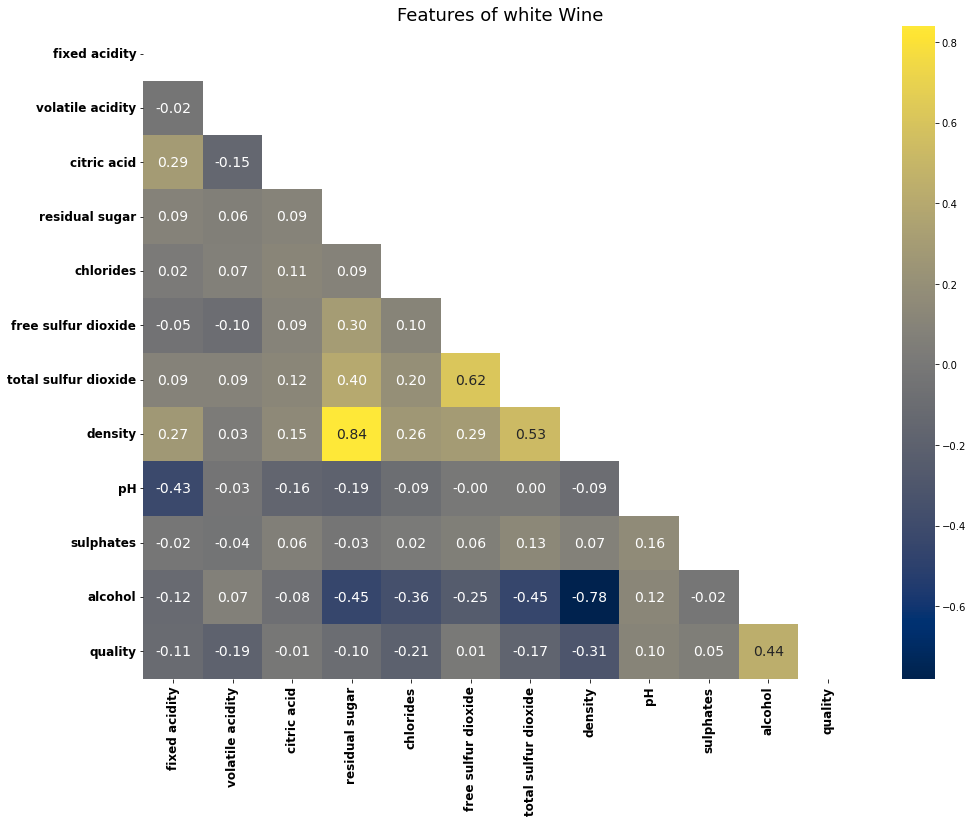

In [62]:
plt.figure(figsize=(16,12))
sb.heatmap(new_white_wine.corr(),mask=mask, cmap= "cividis",annot=True,annot_kws={'size':14},fmt=".2f")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Features of white Wine" ,fontsize=18)

plt.show()

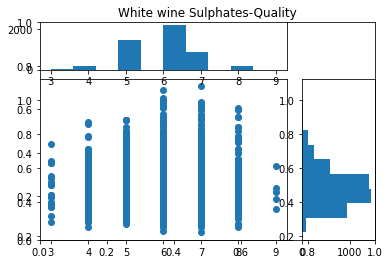

In [63]:
fig = plt.figure()
gs = GridSpec(4, 4)
plt.title("White wine Sulphates-Quality")
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(white_wine['quality'], white_wine['sulphates'])

ax_hist_x.hist(white_wine['quality'])
ax_hist_y.hist(white_wine['sulphates'], orientation = 'horizontal',)

plt.show()

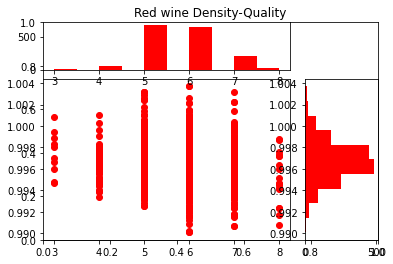

In [64]:
fig = plt.figure()
gs = GridSpec(4, 4)
plt.title("Red wine Density-Quality")
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(red_wine['quality'], red_wine['density'], color='red')

ax_hist_x.hist(red_wine['quality'], color='red')
ax_hist_y.hist(red_wine['density'], orientation = 'horizontal', color='red')

plt.show()

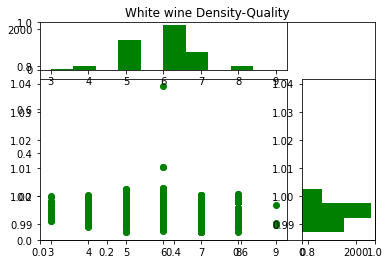

In [65]:
fig = plt.figure()
gs = GridSpec(4, 4)
plt.title("White wine Density-Quality")
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(white_wine['quality'], white_wine['density'],color='green')

ax_hist_x.hist(white_wine['quality'],color='green')
ax_hist_y.hist(white_wine['density'], orientation = 'horizontal',color='green')

plt.show()

# Using scatterplot to show if the components of wine are correlated and how;positively correlated, negatively correlated or not correlated.


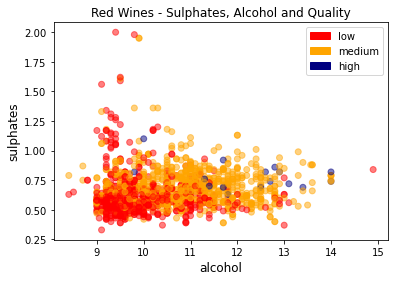

In [66]:
#viusualising with a scatterplot low,meduim and high quality wines andtheir alcohol and sulphate content
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["alcohol"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("sulphates", fontsize=12)
ax.set_title('Red Wines - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

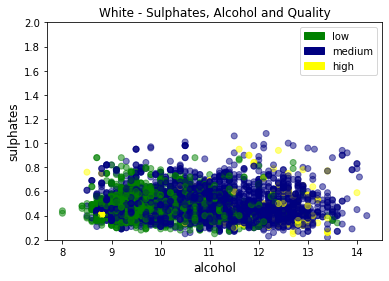

In [67]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["alcohol"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("sulphates", fontsize=12)
ax.set_title('White - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])
plt.ylim(0.2,2.0)
plt.show()

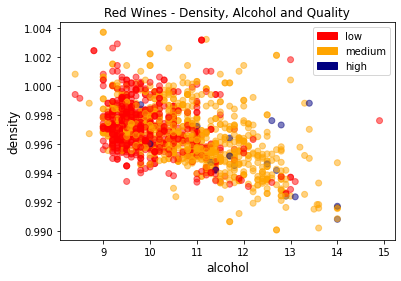

In [68]:
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["alcohol"], red_wine["density"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('Red Wines - Density, Alcohol and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

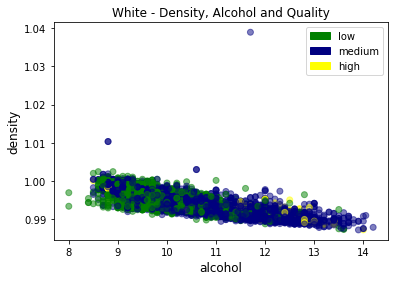

In [69]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["alcohol"], white_wine["density"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('White - Density, Alcohol and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

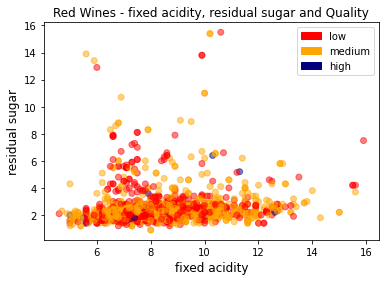

In [70]:
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["fixed acidity"], red_wine["residual sugar"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("fixed acidity", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('Red Wines - fixed acidity, residual sugar and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

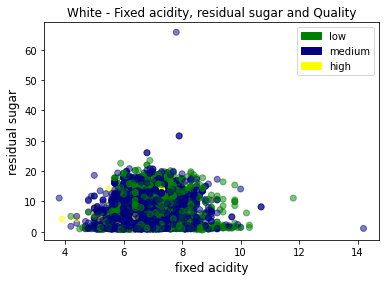

In [71]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["fixed acidity"], white_wine["residual sugar"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("fixed acidity", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('White - Fixed acidity, residual sugar and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

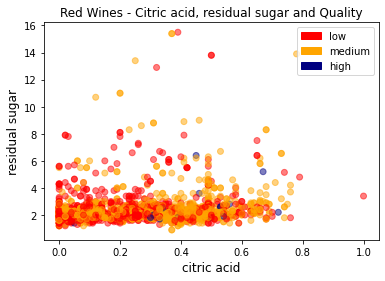

In [72]:
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["citric acid"], red_wine["residual sugar"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("citric acid", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('Red Wines - Citric acid, residual sugar and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

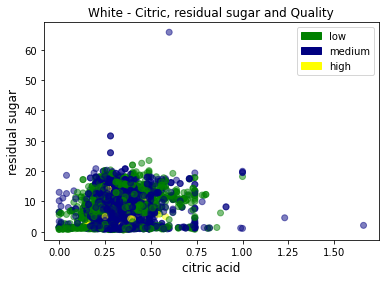

In [73]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["citric acid"], white_wine["residual sugar"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("citric acid", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('White - Citric, residual sugar and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

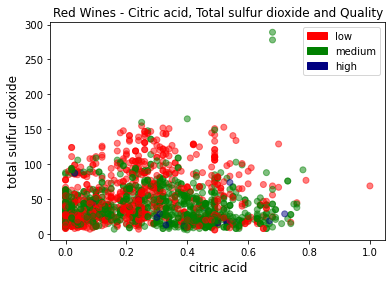

In [74]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["citric acid"], red_wine["total sulfur dioxide"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("citric acid", fontsize=12)
ax.set_ylabel("total sulfur dioxide", fontsize=12)
ax.set_title('Red Wines - Citric acid, Total sulfur dioxide and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

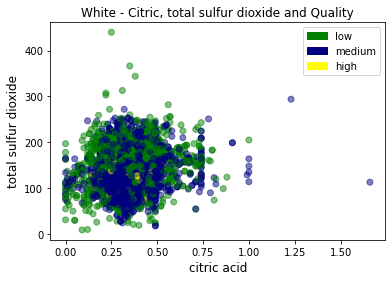

In [75]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["citric acid"], white_wine["total sulfur dioxide"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("citric acid", fontsize=12)
ax.set_ylabel("total sulfur dioxide", fontsize=12)
ax.set_title('White - Citric, total sulfur dioxide and Quality')


low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

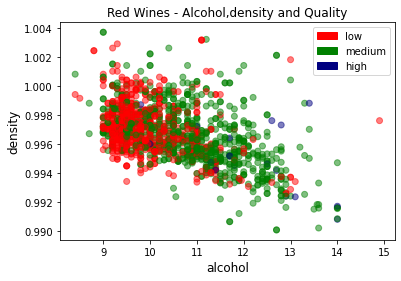

In [76]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["alcohol"], red_wine["density"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('Red Wines - Alcohol,density and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

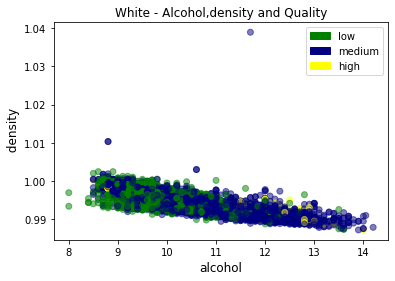

In [77]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["alcohol"], white_wine["density"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel(" density", fontsize=12)
ax.set_title('White - Alcohol,density and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

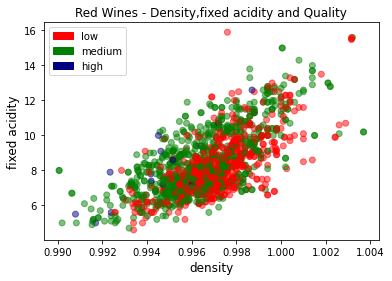

In [78]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["density"], red_wine["fixed acidity"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("density", fontsize=12)
ax.set_ylabel("fixed acidity", fontsize=12)
ax.set_title('Red Wines - Density,fixed acidity and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

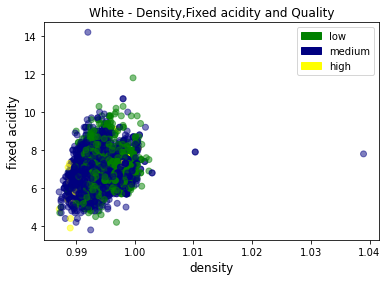

In [79]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["density"], white_wine["fixed acidity"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("density", fontsize=12)
ax.set_ylabel("fixed acidity", fontsize=12)
ax.set_title('White - Density,Fixed acidity and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

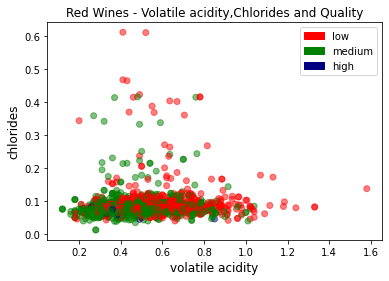

In [80]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["volatile acidity"], red_wine["chlorides"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("volatile acidity", fontsize=12)
ax.set_ylabel("chlorides", fontsize=12)
ax.set_title('Red Wines - Volatile acidity,Chlorides and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

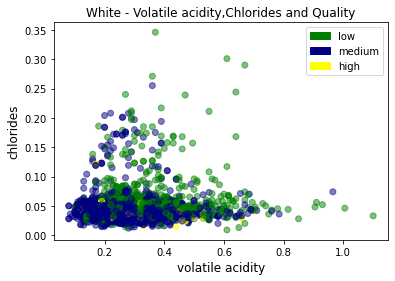

In [81]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["volatile acidity"], white_wine["chlorides"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("volatile acidity", fontsize=12)
ax.set_ylabel("chlorides", fontsize=12)
ax.set_title('White - Volatile acidity,Chlorides and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

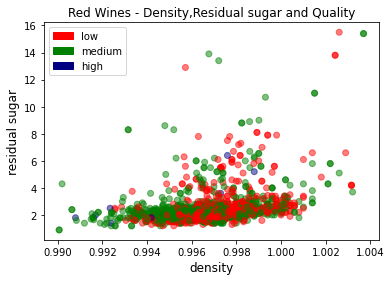

In [82]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["density"], red_wine["residual sugar"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("density", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('Red Wines - Density,Residual sugar and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

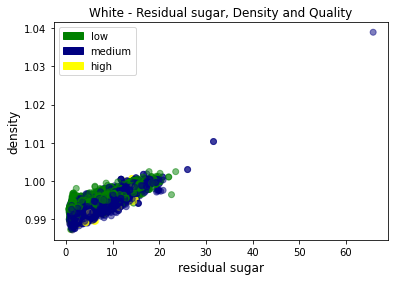

In [83]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["residual sugar"], white_wine["density"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("residual sugar", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('White - Residual sugar, Density and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

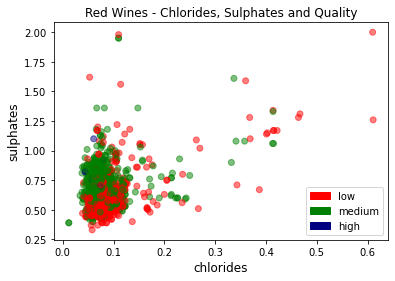

In [84]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["chlorides"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("chlorides", fontsize=12)
ax.set_ylabel("sulphates", fontsize=12)
ax.set_title('Red Wines - Chlorides, Sulphates and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

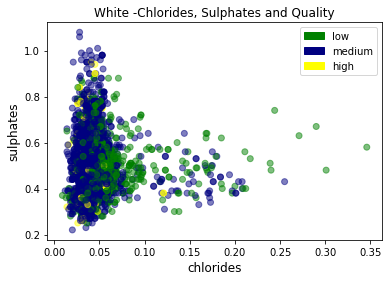

In [85]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["chlorides"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("chlorides", fontsize=12)
ax.set_ylabel("sulphates", fontsize=12)
ax.set_title('White -Chlorides, Sulphates and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

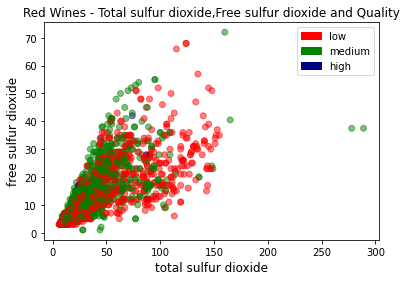

In [86]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["total sulfur dioxide"], red_wine["free sulfur dioxide"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("total sulfur dioxide", fontsize=12)
ax.set_ylabel("free sulfur dioxide", fontsize=12)
ax.set_title('Red Wines - Total sulfur dioxide,Free sulfur dioxide and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

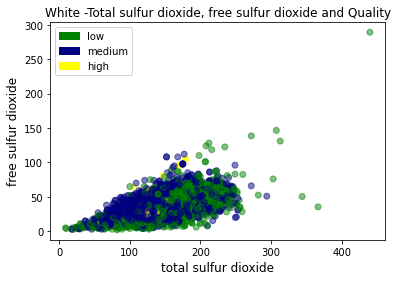

In [87]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["total sulfur dioxide"], white_wine["free sulfur dioxide"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("total sulfur dioxide", fontsize=12)
ax.set_ylabel("free sulfur dioxide", fontsize=12)
ax.set_title('White -Total sulfur dioxide, free sulfur dioxide and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

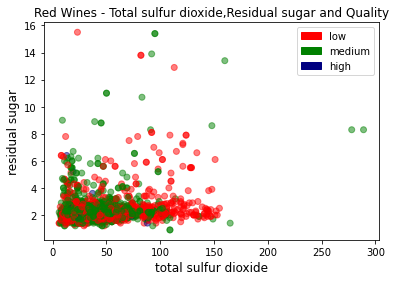

In [88]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["total sulfur dioxide"], red_wine["residual sugar"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("total sulfur dioxide", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('Red Wines - Total sulfur dioxide,Residual sugar and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

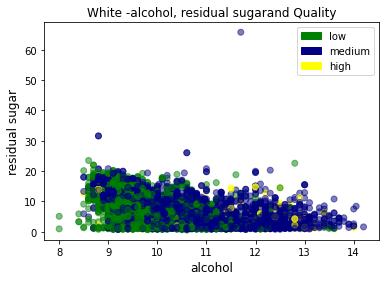

In [89]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["alcohol"], white_wine["residual sugar"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('White -alcohol, residual sugarand Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

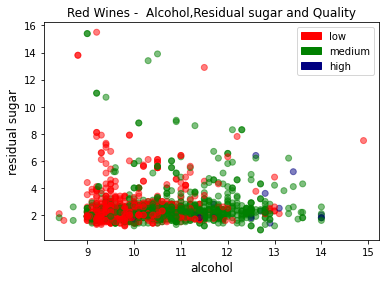

In [90]:
colors = {"low": "red", "medium": "green", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["alcohol"], red_wine["residual sugar"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=12)
ax.set_ylabel("residual sugar", fontsize=12)
ax.set_title('Red Wines -  Alcohol,Residual sugar and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='green', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

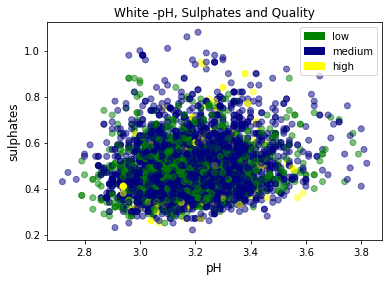

In [91]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["pH"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("pH", fontsize=12)
ax.set_ylabel("sulphates", fontsize=12)
ax.set_title('White -pH, Sulphates and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

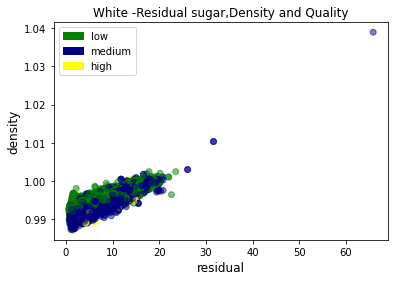

In [92]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["residual sugar"], white_wine["density"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("residual", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('White -Residual sugar,Density and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

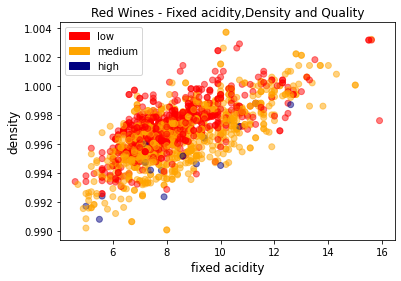

In [93]:
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["fixed acidity"], red_wine["density"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("fixed acidity", fontsize=12)
ax.set_ylabel("density", fontsize=12)
ax.set_title('Red Wines - Fixed acidity,Density and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

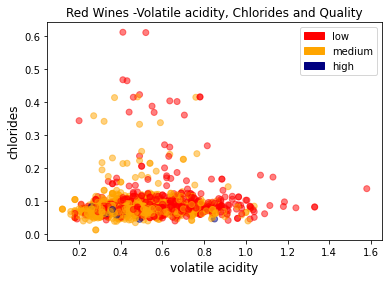

In [94]:
colors = {"low": "red", "medium": "orange", "high": "navy"}

fig, ax = plt.subplots()
scatter = ax.scatter(red_wine["volatile acidity"], red_wine["chlorides"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("volatile acidity", fontsize=12)
ax.set_ylabel("chlorides", fontsize=12)
ax.set_title('Red Wines -Volatile acidity, Chlorides and Quality')

low_quality = mpatches.Patch(color='red', label='low')
medium_quality = mpatches.Patch(color='orange', label='medium')
high_quality = mpatches.Patch(color='navy', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

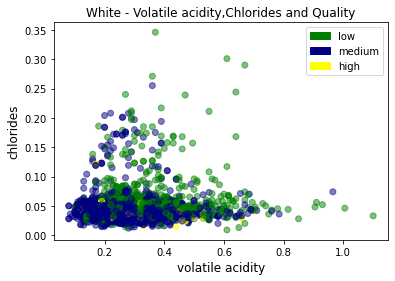

In [95]:
colors = {"low": "green", "medium": "navy", "high": "yellow"}

fig, ax = plt.subplots()
scatter = ax.scatter(white_wine["volatile acidity"], white_wine["chlorides"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("volatile acidity", fontsize=12)
ax.set_ylabel("chlorides", fontsize=12)
ax.set_title('White - Volatile acidity,Chlorides and Quality')

low_quality = mpatches.Patch(color='green', label='low')
medium_quality = mpatches.Patch(color='navy', label='medium')
high_quality = mpatches.Patch(color='yellow', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

# Skewness

In [96]:
#checking skewness
print(wines['quality'].astype(float).skew())


0.18962269337269674


In [97]:
print(wines['alcohol'].astype(float).skew())

0.5657177290985089


In [98]:
print(wines['fixed acidity'].astype(float).skew())

1.7232896467669256


In [99]:
print(wines['volatile acidity'].astype(float).kurt())

2.8253724172310117


In [100]:
print(red_wine['quality'].astype(float).skew())

0.21780157547366327


In [101]:
print(red_wine['alcohol'].astype(float).skew())

0.8608288068888538


In [102]:
print(red_wine['fixed acidity'].astype(float).skew())

0.9827514413284587


In [103]:
print(red_wine['volatile acidity'].astype(float).kurt())

1.2255422501791422


In [104]:
print(white_wine['quality'].astype(float).skew())

0.15579639772222578


In [105]:
print(white_wine['alcohol'].astype(float).skew())

0.4873419932161276


In [106]:
print(white_wine['fixed acidity'].astype(float).skew())

0.6477514746297539


In [107]:
print(white_wine['fixed acidity'].astype(float).kurt())

2.1721784645585807


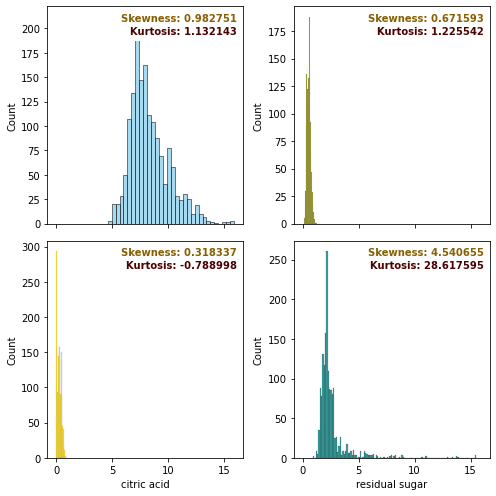

In [108]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(red_wine.iloc[:,0], color="skyblue", ax=axes[0,0])
sb.histplot(red_wine.iloc[:,1], color="olive", ax=axes[0,1])
sb.histplot(red_wine.iloc[:,2], color="gold", ax=axes[1,0])
sb.histplot(red_wine.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % red_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % red_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

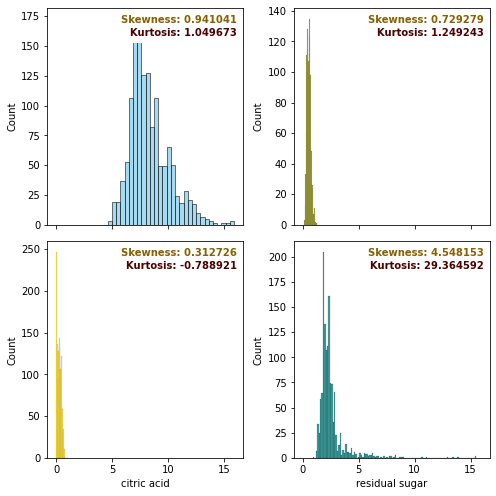

In [266]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(red_wine.iloc[:,0], color="skyblue", ax=axes[0,0])
sb.histplot(red_wine.iloc[:,1], color="olive", ax=axes[0,1])
sb.histplot(red_wine.iloc[:,2], color="gold", ax=axes[1,0])
sb.histplot(red_wine.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % red_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % red_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

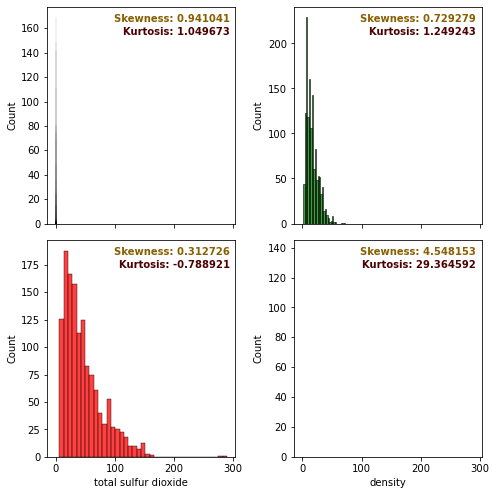

In [267]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(red_wine.iloc[:,4], color="darkblue", ax=axes[0,0])
sb.histplot(red_wine.iloc[:,5], color="green", ax=axes[0,1])
sb.histplot(red_wine.iloc[:,6], color="red", ax=axes[1,0])
sb.histplot(red_wine.iloc[:,7], color="brown", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % red_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % red_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

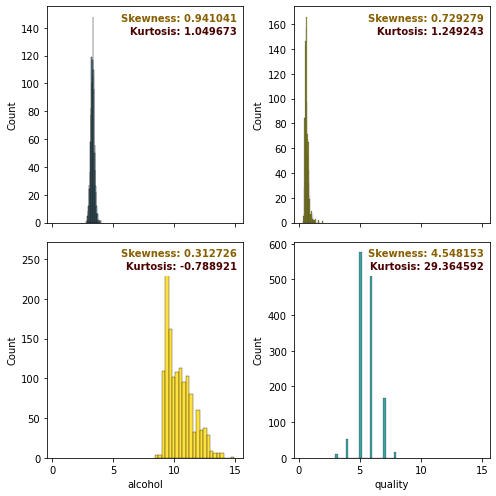

In [268]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(red_wine.iloc[:,8], color="skyblue", ax=axes[0,0])
sb.histplot(red_wine.iloc[:,9], color="olive", ax=axes[0,1])
sb.histplot(red_wine.iloc[:,10], color="gold", ax=axes[1,0])
sb.histplot(red_wine.iloc[:,11], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % red_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % red_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [109]:
#dropping duplicates in combine wines(1177 rows were dropped).
wines=wines.drop_duplicates()
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,low,white
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,high,white
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,medium,white
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,low,white


In [110]:
# 239 duplicates dropped.
red_wine=red_wine.drop_duplicates()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red


In [111]:
# 936 duplicates dropped.
white_wine= white_wine.drop_duplicates()
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white


In [269]:
cols = ['fixed acidity', 'residual sugar', 'total sulfur dioxide','alcohol'] # The columns you want to search for outliers in
red_wine=red_wine.copy(deep=True)
# Calculate quantiles and IQR
Q1 = red_wine[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = red_wine[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((red_wine[cols] < (Q1 - 1.5 * IQR)) | (red_wine[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_red_wine = red_wine[condition]
filtered_red_wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False,False,False


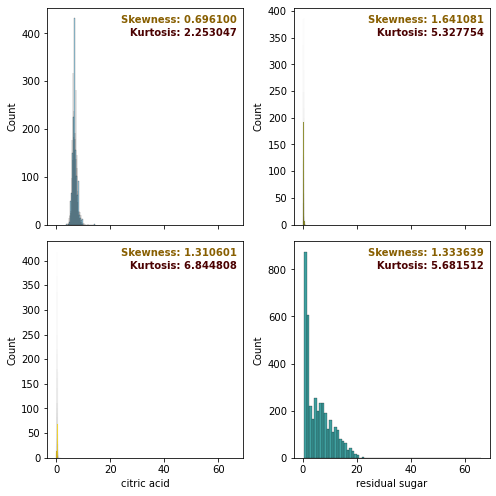

In [116]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(white_wine.iloc[:,0], color="skyblue", ax=axes[0,0])
sb.histplot(white_wine.iloc[:,1], color="olive", ax=axes[0,1])
sb.histplot(white_wine.iloc[:,2], color="gold", ax=axes[1,0])
sb.histplot(white_wine.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % white_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % white_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

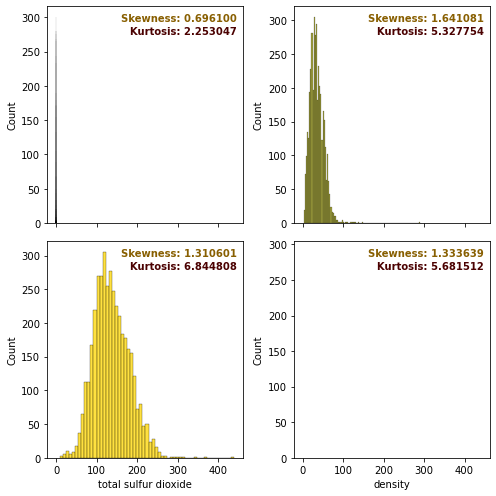

In [117]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(white_wine.iloc[:,4], color="skyblue", ax=axes[0,0])
sb.histplot(white_wine.iloc[:,5], color="olive", ax=axes[0,1])
sb.histplot(white_wine.iloc[:,6], color="gold", ax=axes[1,0])
sb.histplot(white_wine.iloc[:,7], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % white_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % white_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

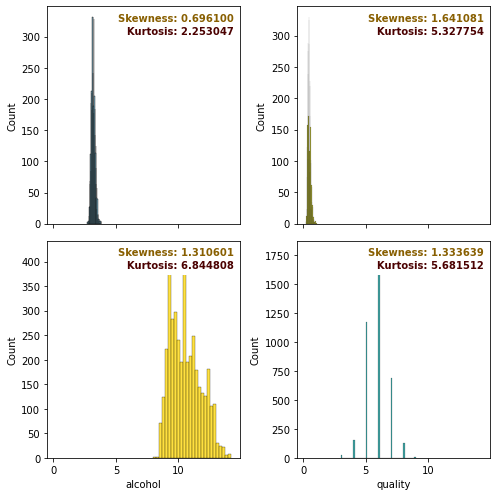

In [118]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(white_wine.iloc[:,8], color="skyblue", ax=axes[0,0])
sb.histplot(white_wine.iloc[:,9], color="olive", ax=axes[0,1])
sb.histplot(white_wine.iloc[:,10], color="gold", ax=axes[1,0])
sb.histplot(white_wine.iloc[:,11], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % white_wine.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % white_wine.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

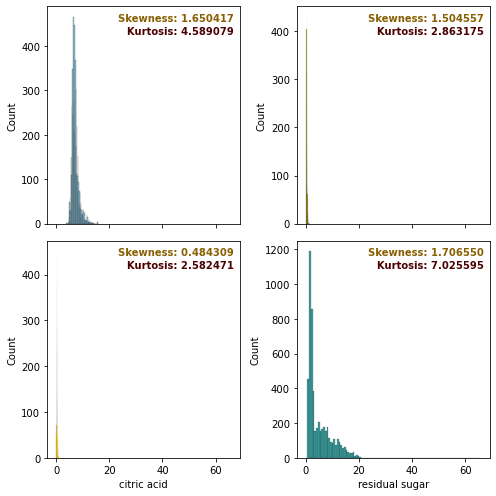

In [270]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(wines.iloc[:,0], color="skyblue", ax=axes[0,0])
sb.histplot(wines.iloc[:,1], color="olive", ax=axes[0,1])
sb.histplot(wines.iloc[:,2], color="gold", ax=axes[1,0])
sb.histplot(wines.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % wines.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % wines.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

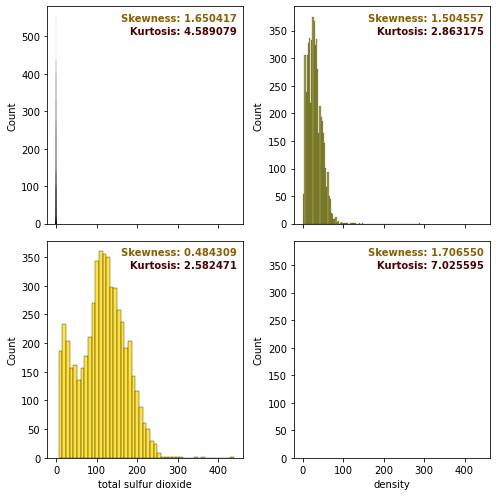

In [271]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(wines.iloc[:,4], color="skyblue", ax=axes[0,0])
sb.histplot(wines.iloc[:,5], color="olive", ax=axes[0,1])
sb.histplot(wines.iloc[:,6], color="gold", ax=axes[1,0])
sb.histplot(wines.iloc[:,7], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % wines.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % wines.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

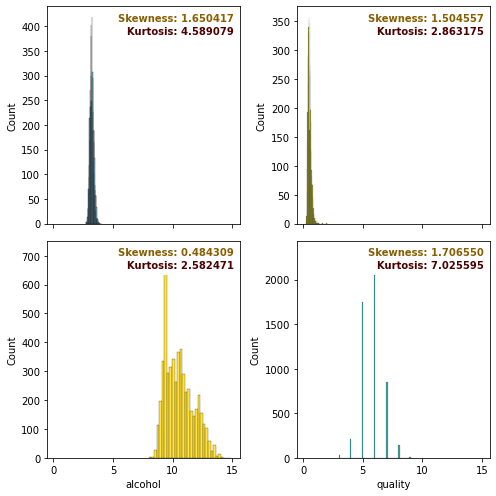

In [272]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.histplot(wines.iloc[:,8], color="skyblue", ax=axes[0,0])
sb.histplot(wines.iloc[:,9], color="olive", ax=axes[0,1])
sb.histplot(wines.iloc[:,10], color="gold", ax=axes[1,0])
sb.histplot(wines.iloc[:,11], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % wines.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % wines.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

In [119]:
#checking  for null values
cols = [ 'residual sugar', 'total sulfur dioxide'] # The columns you want to search for outliers in
white_wine = white_wine.copy(deep=True)
# Calculate quantiles and IQR
Q1 = white_wine[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = white_wine[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((white_wine[cols] < (Q1 - 1.5 * IQR)) | (white_wine[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_white_wine = white_wine[condition]
filtered_white_wine.isnull() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Machine learning algorithms for wines

In [123]:
cols = [ 'residual sugar', 'total sulfur dioxide','alcohol'] # The columns you want to search for outliers in
wines=wines.copy(deep=True)
# Calculate quantiles and IQR
Q1 = wines[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = wines[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((wines[cols] < (Q1 - 1.5 * IQR)) | (wines[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_wines = wines[condition]
filtered_wines.isnull() 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6491,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
# in order for some accuracy i dropped some columns that had no signicant correlation to prevent overcrowding of my machine learning model
filtered_wines_features= filtered_wines.drop(['free sulfur dioxide', 'quality', 'quality_label','wine_type'], axis=1) 

In [125]:
y=filtered_wines.wine_type

In [126]:
#dependent and independent variable
X=filtered_wines_features
y=filtered_wines.wine_type
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,229.0,0.99888,3.11,0.50,8.9


In [127]:
y.head()

0    white
1      red
2    white
3    white
4    white
Name: wine_type, dtype: object

In [128]:
#transforming your wine type to 1 and 0 as machine learning models do not understand words
le =LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 0, 1, ..., 1, 1, 1])

In [129]:
# dataset is divided to train and test data so that when you finish predicting with ML you have a data to compare your result
#to see how accurate your predictions can be.Test size was a third  dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.3, random_state=42)

# Normalization


In [130]:

scaler = MinMaxScaler().fit(X_train)

In [131]:
#the train data was transformed such that it lies between 0-1 to make machine learning function better and also take care of the different of each column
# had,ie all the data was given equal weight
X_train = scaler.transform(X_train)
X_train

array([[0.25641026, 0.2       , 0.22891566, ..., 0.23255814, 0.14606742,
        0.19354839],
       [0.16239316, 0.15333333, 0.19277108, ..., 0.41085271, 0.16853933,
        0.91935484],
       [0.1965812 , 0.12666667, 0.10843373, ..., 0.53488372, 0.15730337,
        0.32258065],
       ...,
       [0.09401709, 0.31333333, 0.08433735, ..., 0.62790698, 0.16292135,
        0.72580645],
       [0.15384615, 0.16666667, 0.09036145, ..., 0.51162791, 0.2247191 ,
        0.30645161],
       [0.28205128, 0.12666667, 0.44578313, ..., 0.24806202, 0.12359551,
        0.11290323]])

In [132]:
#transform test data(1/3 of Xdata)
X_test = scaler.transform(X_test)
X_test

array([[0.41880342, 0.1       , 0.21084337, ..., 0.1627907 , 0.15168539,
        0.17741935],
       [0.46153846, 0.20666667, 0.24096386, ..., 0.48062016, 0.29775281,
        0.35483871],
       [0.23931624, 0.14      , 0.27108434, ..., 0.3255814 , 0.19662921,
        0.17741935],
       ...,
       [0.22222222, 0.20666667, 0.13855422, ..., 0.55813953, 0.18539326,
        0.66129032],
       [0.38461538, 0.39333333, 0.11445783, ..., 0.37209302, 0.20786517,
        0.19354839],
       [0.23931624, 0.13333333, 0.1686747 , ..., 0.41860465, 0.09550562,
        0.59677419]])

# Logistic Regression

In [133]:
lr = LogisticRegression()

In [134]:
lr.fit(X_train, y_train)

LogisticRegression()

In [135]:
pred_lr = lr.predict(X_test)
pred_lr

array([1, 0, 1, ..., 1, 0, 1])

In [136]:
print("Accuracy score:", accuracy_score(y_test, pred_lr).round(5))

Accuracy score: 0.99097


In [137]:
print(classification_report(y_test, pred_lr, target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.99      0.97      0.98       426
       white       0.99      1.00      0.99      1125

    accuracy                           0.99      1551
   macro avg       0.99      0.99      0.99      1551
weighted avg       0.99      0.99      0.99      1551



In [138]:
kappa = cohen_kappa_score(pred_lr, y_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.9772129103753983


In [139]:
cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
cv

StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

In [140]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.9775571725820625

# Support Vector

In [141]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9935525467440361

In [142]:
pred_svm = svm.predict(X_test)
pred_svm

array([1, 0, 1, ..., 1, 0, 1])

In [143]:
print("Accuracy score:", accuracy_score(y_test, pred_svm))

Accuracy score: 0.9935525467440361


In [144]:
print(classification_report(y_test, pred_svm, target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       426
       white       0.99      1.00      1.00      1125

    accuracy                           0.99      1551
   macro avg       0.99      0.99      0.99      1551
weighted avg       0.99      0.99      0.99      1551



In [145]:
kappa = cohen_kappa_score(pred_svm, y_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.9837948306450096


In [146]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = SVC()
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.9220347896149546

# Random Forest Classifier

In [147]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9916183107672469

In [148]:
pred_rf = rf.predict(X_test)
pred_rf

array([1, 0, 1, ..., 1, 0, 1])

In [149]:
print("Accuracy score:", accuracy_score(y_test, pred_rf))

Accuracy score: 0.9916183107672469


In [150]:
print(classification_report(y_test, pred_rf, target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.99      0.98      0.98       426
       white       0.99      1.00      0.99      1125

    accuracy                           0.99      1551
   macro avg       0.99      0.99      0.99      1551
weighted avg       0.99      0.99      0.99      1551



In [151]:
kappa = cohen_kappa_score(pred_rf, y_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.9788560696387506


In [152]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = RandomForestClassifier()
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.994196093995053

# Naive Bayes

In [153]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [154]:
pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [155]:
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, pred_gnb))

Gaussian Naive Bayes model accuracy: 0.968407479045777


In [156]:
print(classification_report(y_test, pred_gnb, target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.93      0.96      0.94       426
       white       0.98      0.97      0.98      1125

    accuracy                           0.97      1551
   macro avg       0.96      0.97      0.96      1551
weighted avg       0.97      0.97      0.97      1551



In [157]:
kappa = cohen_kappa_score(pred_gnb, y_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.921455124965507


In [158]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = GaussianNB()
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.9715602170774281

# Decision Tree

In [159]:
dtc = DecisionTreeClassifier(random_state=0)


In [160]:
pred_dtc = dtc.fit(X_train, y_train).predict(X_test)

In [161]:
print("Decisiontree model accuracy:", metrics.accuracy_score(y_test, pred_dtc))

Decisiontree model accuracy: 0.9761444229529336


In [162]:
print(classification_report(y_test, pred_dtc, target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.95      0.97      0.96       426
       white       0.99      0.98      0.98      1125

    accuracy                           0.98      1551
   macro avg       0.97      0.97      0.97      1551
weighted avg       0.98      0.98      0.98      1551



In [163]:
kappa = cohen_kappa_score(pred_dtc, y_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.9405187237443136


In [164]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = DecisionTreeClassifier()
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.9802671984656605

# Machine Learning Algorithms for Red wine

In [165]:
filtered_red_wine = filtered_red_wine.drop(['free sulfur dioxide','citric acid', 'density','quality_label', 'wine_type'], axis=1) 


In [166]:
filtered_red_wine.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4,5
1,7.8,0.88,2.6,0.098,67.0,3.20,0.68,9.8,5
2,7.8,0.76,2.3,0.092,54.0,3.26,0.65,9.8,5
3,11.2,0.28,1.9,0.075,60.0,3.16,0.58,9.8,6
5,7.4,0.66,1.8,0.075,40.0,3.51,0.56,9.4,5


In [167]:
filtered_red_wine.value_counts('quality')

quality
5    485
6    477
7    134
4     44
8     12
3      8
dtype: int64

In [168]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
filtered_red_wine['quality_label'] = filtered_red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
filtered_red_wine['quality_label'] = pd.Categorical(filtered_red_wine['quality_label'],
categories=[ 'low', 'medium'])

In [169]:
filtered_red_wine.head(10)

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,1.9,0.076,34.0,3.51,0.56,9.4,5,low
1,7.8,0.880,2.6,0.098,67.0,3.20,0.68,9.8,5,low
2,7.8,0.760,2.3,0.092,54.0,3.26,0.65,9.8,5,low
3,11.2,0.280,1.9,0.075,60.0,3.16,0.58,9.8,6,medium
5,7.4,0.660,1.8,0.075,40.0,3.51,0.56,9.4,5,low
6,7.9,0.600,1.6,0.069,59.0,3.30,0.46,9.4,5,low
7,7.3,0.650,1.2,0.065,21.0,3.39,0.47,10.0,7,medium
8,7.8,0.580,2.0,0.073,18.0,3.36,0.57,9.5,7,medium
10,6.7,0.580,1.8,0.097,65.0,3.28,0.54,9.2,5,low
12,5.6,0.615,1.6,0.089,59.0,3.58,0.52,9.9,5,low


In [170]:
filtered_red_wine.value_counts('quality_label')

quality_label
medium    623
low       537
dtype: int64

In [171]:
filtered_red_wineX= filtered_red_wine.drop(['quality','quality_label'],axis=1)

In [172]:
filtered_red_wineX.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,1.9,0.076,34.0,3.51,0.56,9.4
1,7.8,0.88,2.6,0.098,67.0,3.20,0.68,9.8
2,7.8,0.76,2.3,0.092,54.0,3.26,0.65,9.8
3,11.2,0.28,1.9,0.075,60.0,3.16,0.58,9.8
5,7.4,0.66,1.8,0.075,40.0,3.51,0.56,9.4


In [173]:
filtered_red_winey=filtered_red_wine.quality_label

In [174]:
filtered_red_winey.head(5)

0       low
1       low
2       low
3    medium
5       low
Name: quality_label, dtype: category
Categories (2, object): ['low', 'medium']

In [175]:
X_red=filtered_red_wineX
y_red=filtered_red_winey

In [176]:
le =LabelEncoder()
y_red = le.fit_transform(y_red)
y_red

array([0, 0, 0, ..., 1, 0, 1])

In [177]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red,y_red,test_size=0.3, random_state=42)

In [178]:
scaler = MinMaxScaler().fit(X_red_train)

In [179]:
X_red_train = scaler.transform(X_red_train)
X_red_train

array([[0.42857143, 0.20512821, 0.25      , ..., 0.44094488, 0.35329341,
        0.2244898 ],
       [0.77922078, 0.12820513, 0.41666667, ..., 0.31496063, 0.10778443,
        0.28571429],
       [0.42857143, 0.47863248, 0.58333333, ..., 0.51968504, 0.11976048,
        0.2244898 ],
       ...,
       [0.25974026, 0.61538462, 0.41666667, ..., 0.62204724, 0.13772455,
        0.30612245],
       [0.24675325, 0.61965812, 0.45833333, ..., 0.64566929, 0.10778443,
        0.48979592],
       [0.32467532, 0.43589744, 0.45833333, ..., 0.5511811 , 0.1257485 ,
        0.20408163]])

In [180]:
X_red_test = scaler.transform(X_red_test)
X_red_test

array([[0.66233766, 0.11538462, 0.125     , ..., 0.31496063, 0.10778443,
        0.51020408],
       [0.33766234, 0.42735043, 0.54166667, ..., 0.41732283, 0.26946108,
        0.89795918],
       [0.45454545, 0.18803419, 0.25      , ..., 0.44094488, 0.43113772,
        0.20408163],
       ...,
       [0.33766234, 0.18803419, 0.66666667, ..., 0.47244094, 0.23353293,
        0.91836735],
       [0.38961039, 0.23076923, 0.625     , ..., 0.5511811 , 0.1257485 ,
        0.7755102 ],
       [0.32467532, 0.47435897, 0.47916667, ..., 0.43307087, 0.07185629,
        0.20408163]])

# Logistic Regression(Red wine)

In [181]:
lr_red = LogisticRegression()

In [182]:
lr_red.fit(X_red_train, y_red_train)

LogisticRegression()

In [183]:
pred_lr_red= lr_red.predict(X_red_test)
pred_lr_red

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [184]:
print("Confusion matrix:")
print(confusion_matrix(y_red_test, pred_lr_red))

Confusion matrix:
[[118  29]
 [ 61 140]]


In [185]:
print("Accuracy score:", accuracy_score(y_red_test, pred_lr_red))

Accuracy score: 0.7413793103448276


In [186]:
print(classification_report(y_red_test, pred_lr_red, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.66      0.80      0.72       147
      medium       0.83      0.70      0.76       201

    accuracy                           0.74       348
   macro avg       0.74      0.75      0.74       348
weighted avg       0.76      0.74      0.74       348



In [187]:
kappa = cohen_kappa_score(pred_lr_red, y_red_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.4850547499260136


In [188]:
cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
cv

StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

In [189]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results= cross_val_score(model, X, y, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.9775571725820625

# support vector

In [190]:

svm=SVC()
svm.fit(X_red_train,y_red_train)
svm.score(X_red_test,y_red_test)


0.7298850574712644

In [191]:
pred_svm_red = svm.predict(X_red_test)
pred_svm_red

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [192]:
print("Confusion matrix:")
print(confusion_matrix(y_red_test, pred_svm_red))


Confusion matrix:
[[115  32]
 [ 62 139]]


In [193]:
print("Accuracy score:", accuracy_score(y_red_test, pred_svm_red))

Accuracy score: 0.7298850574712644


In [194]:
print(classification_report(y_red_test, pred_svm_red, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.65      0.78      0.71       147
      medium       0.81      0.69      0.75       201

    accuracy                           0.73       348
   macro avg       0.73      0.74      0.73       348
weighted avg       0.74      0.73      0.73       348



In [195]:
kappa = cohen_kappa_score(pred_svm_red, y_red_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.4612115821721514


In [196]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = SVC()
results= cross_val_score(model, X_red, y_red, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.6120689655172413

# Random forest

In [197]:
rf=RandomForestClassifier()
rf.fit(X_red_train,y_red_train)
rf.score(X_red_test,y_red_test)

0.7557471264367817

In [198]:
pred_rf_red = rf.predict(X_red_test)
pred_rf_red

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [199]:
print("Confusion matrix:")
print(confusion_matrix(y_red_test, pred_rf_red))

Confusion matrix:
[[116  31]
 [ 54 147]]


In [200]:
print("Accuracy score:", accuracy_score(y_red_test, pred_rf_red))

Accuracy score: 0.7557471264367817


In [201]:
print(classification_report(y_red_test, pred_rf_red, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.68      0.79      0.73       147
      medium       0.83      0.73      0.78       201

    accuracy                           0.76       348
   macro avg       0.75      0.76      0.75       348
weighted avg       0.77      0.76      0.76       348



In [202]:
kappa = cohen_kappa_score(pred_rf_red, y_red_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.5097454256165473


In [203]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = RandomForestClassifier()
results= cross_val_score(model, X_red, y_red, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.7422413793103448

# Naive Bayes

In [204]:
gnb = GaussianNB()
gnb.fit(X_red_train, y_red_train)

GaussianNB()

In [205]:
pred_gnb_red = gnb.fit(X_red_train, y_red_train).predict(X_red_test)

In [206]:
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_red_test, pred_gnb_red))

Gaussian Naive Bayes model accuracy: 0.7298850574712644


In [207]:
print(classification_report(y_red_test, pred_gnb_red, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.67      0.71      0.69       147
      medium       0.78      0.74      0.76       201

    accuracy                           0.73       348
   macro avg       0.72      0.73      0.73       348
weighted avg       0.73      0.73      0.73       348



In [208]:
kappa = cohen_kappa_score(pred_gnb_red, y_red_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.4514538685984505


In [209]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = GaussianNB()
results= cross_val_score(model, X_red, y_red, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.7258620689655172

# Decision Tree

In [210]:
dtc = DecisionTreeClassifier(random_state=0)

In [211]:
pred_dtc_red = dtc.fit(X_red_train, y_red_train).predict(X_red_test)

In [212]:
print("Decisiontree model accuracy:", metrics.accuracy_score(y_red_test, pred_dtc_red))

Decisiontree model accuracy: 0.6752873563218391


In [213]:
print(classification_report(y_red_test, pred_dtc_red, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.62      0.61      0.61       147
      medium       0.72      0.72      0.72       201

    accuracy                           0.68       348
   macro avg       0.67      0.67      0.67       348
weighted avg       0.67      0.68      0.68       348



In [214]:
kappa = cohen_kappa_score(pred_dtc_red, y_red_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.33394308943089435


In [215]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = DecisionTreeClassifier()
results= cross_val_score(model, X_red, y_red, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.6577586206896552

# Machine learning Algorithms for White wine

In [216]:
filtered_white_wine =filtered_white_wine.drop(['residual sugar','quality_label','wine_type'],axis=1)

In [217]:
filtered_white_wine.head(5)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [218]:
filtered_white_wine.value_counts('quality')

quality
6    1776
5    1162
7     689
4     151
8     131
3      17
9       5
dtype: int64

In [219]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
filtered_white_wine['quality_label'] = filtered_white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
filtered_white_wine['quality_label'] = pd.Categorical(filtered_white_wine['quality_label'],
categories=[ 'low', 'medium'])

In [220]:
filtered_white_wine.head(5)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
6,6.2,0.32,0.16,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium
9,8.1,0.22,0.43,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium


In [221]:
filtered_white_wine.value_counts('quality_label')

quality_label
medium    2601
low       1330
dtype: int64

In [222]:
filtered_white_wineX= filtered_white_wine.drop(['quality','quality_label'],axis=1)

In [223]:
filtered_white_winey=filtered_white_wine.quality_label

In [224]:
X_white=filtered_white_wineX
y_white=filtered_white_winey

In [225]:
le =LabelEncoder()
y_white = le.fit_transform(y_white)
y_white

array([1, 1, 1, ..., 1, 1, 1])

In [226]:
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white,y_white,test_size=0.3, random_state=42)

In [227]:
scaler = MinMaxScaler().fit(X_white_train)

In [228]:
X_white_train = scaler.transform(X_white_train)
X_white_train

array([[0.26923077, 0.34803922, 0.22891566, ..., 0.4537037 , 0.37209302,
        0.17741935],
       [0.34615385, 0.25490196, 0.18072289, ..., 0.47222222, 0.1744186 ,
        0.38709677],
       [0.27884615, 0.37254902, 0.12650602, ..., 0.48148148, 0.37209302,
        0.80645161],
       ...,
       [0.30769231, 0.15686275, 0.21084337, ..., 0.62037037, 0.43023256,
        0.38709677],
       [0.23076923, 0.16666667, 0.26506024, ..., 0.37037037, 0.3372093 ,
        0.19354839],
       [0.44230769, 0.1372549 , 0.18072289, ..., 0.36111111, 0.37209302,
        0.4516129 ]])

In [229]:
X_white_test = scaler.transform(X_white_test)
X_white_test

array([[0.29807692, 0.14705882, 0.19879518, ..., 0.62962963, 0.23255814,
        0.29032258],
       [0.38461538, 0.31372549, 0.15662651, ..., 0.27777778, 0.24418605,
        0.46774194],
       [0.28846154, 0.12745098, 0.21686747, ..., 0.49074074, 0.30232558,
        0.12903226],
       ...,
       [0.26923077, 0.15686275, 0.1626506 , ..., 0.46296296, 0.3372093 ,
        0.19354839],
       [0.36538462, 0.18627451, 0.20481928, ..., 0.2962963 , 0.30232558,
        0.70967742],
       [0.33653846, 0.25490196, 0.23493976, ..., 0.51851852, 0.29069767,
        0.70967742]])

# Logistic Regression

In [230]:
lr_white = LogisticRegression()

In [231]:
lr_white.fit(X_white_train, y_white_train)

LogisticRegression()

In [232]:
pred_lr_white = lr_white.predict(X_white_test)
pred_lr_white

array([1, 1, 0, ..., 1, 1, 1])

In [233]:
print("Confusion matrix:")
print(confusion_matrix(y_white_test, pred_lr_white))

Confusion matrix:
[[199 209]
 [102 670]]


In [234]:
print("Accuracy score:", accuracy_score(y_white_test, pred_lr_white))

Accuracy score: 0.7364406779661017


In [235]:
print(classification_report(y_white_test, pred_lr_white, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.66      0.49      0.56       408
      medium       0.76      0.87      0.81       772

    accuracy                           0.74      1180
   macro avg       0.71      0.68      0.69      1180
weighted avg       0.73      0.74      0.73      1180



In [236]:
kappa = cohen_kappa_score(pred_lr_white,y_white_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.3790566561309229


In [237]:
cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
cv

StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

In [238]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results= cross_val_score(model, X_white, y_white, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.7407790897394194

# Naive Bayes

In [239]:
gnb = GaussianNB()
gnb.fit(X_white_train, y_white_train)

GaussianNB()

In [240]:
pred_gnb_white = gnb.fit(X_white_train, y_white_train).predict(X_white_test)

In [241]:
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_white_test, pred_gnb_white))

Gaussian Naive Bayes model accuracy: 0.7186440677966102


In [242]:
print("Confusion matrix:")
print(confusion_matrix(y_white_test, pred_gnb_white))

Confusion matrix:
[[222 186]
 [146 626]]


In [243]:
print(classification_report(y_white_test, pred_gnb_white, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.60      0.54      0.57       408
      medium       0.77      0.81      0.79       772

    accuracy                           0.72      1180
   macro avg       0.69      0.68      0.68      1180
weighted avg       0.71      0.72      0.71      1180



In [244]:
kappa = cohen_kappa_score(pred_gnb_white, y_white_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.36339763922832924


In [245]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = GaussianNB()
results= cross_val_score(model, X_white, y_white, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.7247580041976327

# Random Forest

In [246]:
rf=RandomForestClassifier()
rf.fit(X_white_train,y_white_train)
rf.score(X_white_test,y_white_test)

0.7652542372881356

In [247]:
pred_rf_white = rf.fit(X_white_train, y_white_train).predict(X_white_test)

In [248]:
print("RandomForest model accuracy:", metrics.accuracy_score(y_white_test, pred_rf_white))

RandomForest model accuracy: 0.7694915254237288


In [249]:
print("Confusion matrix:")
print(confusion_matrix(y_white_test, pred_rf_white))

Confusion matrix:
[[242 166]
 [106 666]]


In [250]:
print(classification_report(y_white_test, pred_rf_white, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.70      0.59      0.64       408
      medium       0.80      0.86      0.83       772

    accuracy                           0.77      1180
   macro avg       0.75      0.73      0.74      1180
weighted avg       0.76      0.77      0.76      1180



In [251]:
kappa = cohen_kappa_score(pred_rf_white, y_white_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.47220248901518136


In [252]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = RandomForestClassifier()
results= cross_val_score(model, X_white, y_white, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.7725783326737843

# Decision tree

In [253]:
dtc = DecisionTreeClassifier(random_state=0)

In [254]:
pred_dtc_white = dtc.fit(X_white_train, y_white_train).predict(X_white_test)

In [255]:
print("Decision Tree model accuracy:", metrics.accuracy_score(y_white_test, pred_dtc_white))

Decision Tree model accuracy: 0.6966101694915254


In [256]:
print("Confusion matrix:")
print(confusion_matrix(y_white_test, pred_dtc_white))

Confusion matrix:
[[211 197]
 [161 611]]


In [257]:
print(classification_report(y_white_test, pred_dtc_white, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.57      0.52      0.54       408
      medium       0.76      0.79      0.77       772

    accuracy                           0.70      1180
   macro avg       0.66      0.65      0.66      1180
weighted avg       0.69      0.70      0.69      1180



In [258]:
kappa = cohen_kappa_score(pred_dtc_white, y_white_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.31516354109926603


In [259]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = DecisionTreeClassifier()
results= cross_val_score(model, X_white, y_white, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.6995667695010701

# Support Vector

In [260]:
svm_white=SVC()
svm_white.fit(X_white_train,y_white_train)


SVC()

In [261]:
pred_svm_white = svm_white.predict(X_white_test)
pred_svm_white

array([1, 1, 1, ..., 1, 1, 1])

In [262]:
print("SVC model accuracy:", metrics.accuracy_score(y_white_test, pred_svm_white))

SVC model accuracy: 0.7703389830508475


In [263]:
print(classification_report(y_white_test, pred_svm_white, target_names=["low","medium"]))

              precision    recall  f1-score   support

         low       0.71      0.57      0.63       408
      medium       0.79      0.88      0.83       772

    accuracy                           0.77      1180
   macro avg       0.75      0.72      0.73      1180
weighted avg       0.76      0.77      0.76      1180



In [264]:
kappa = cohen_kappa_score(pred_svm_white, y_white_test)
print("Cohen-Kappa score:", kappa)


Cohen-Kappa score: 0.4674487233291367


In [265]:
k=4
Skfold = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
model = SVC()
results= cross_val_score(model, X_white, y_white, cv=Skfold)
# Output the accuracy. Calculate the mean and std across all folds. 
results.mean()

0.6609007920804387